In [117]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [118]:
#loading the data
hd = pd.read_csv('heart.csv')

In [119]:
#sample data
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
#finding the statistics of data
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [121]:
#finding the number of rows and columns
hd.shape

(303, 14)

In [122]:
# finding the correlation matrix
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


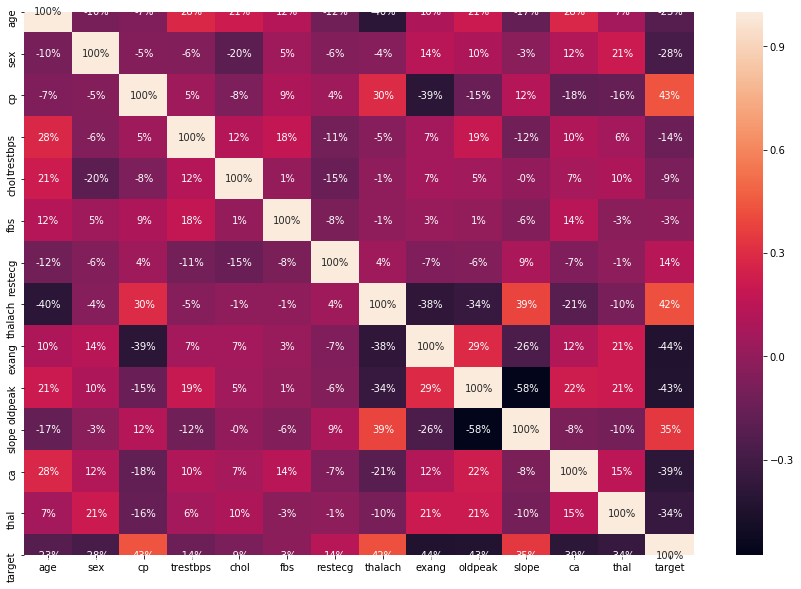

In [123]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(hd.iloc[:,0:15].corr(), annot=True,fmt=".0%")
plt.show()


In [124]:
#Finding the count of people with disesase as per age
hd.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [125]:
#finding the data types of columns
hd.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [126]:
# check for duplicate observations
hd[hd.duplicated(keep=False)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [127]:
# drop duplicate observation
hd = hd.drop_duplicates()


In [128]:
# verify duplicate was removed
hd[hd.duplicated() == True]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [129]:
#finding the count of people having heart disease and without heart disease
hd.target.value_counts()


1    164
0    138
Name: target, dtype: int64

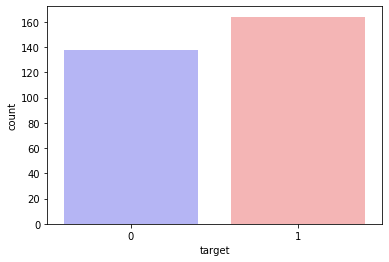

In [130]:
#plotting the graph as per target
sns.countplot(x="target", data=hd, palette="bwr")
plt.show()


In [131]:
countNoDisease = len(hd[hd.target == 0])
countHaveDisease = len(hd[hd.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(hd.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(hd.target))*100)))


Percentage of Patients Haven't Heart Disease: 45.70%
Percentage of Patients Have Heart Disease: 54.30%


Text(0.5, 1.0, 'Frequency')

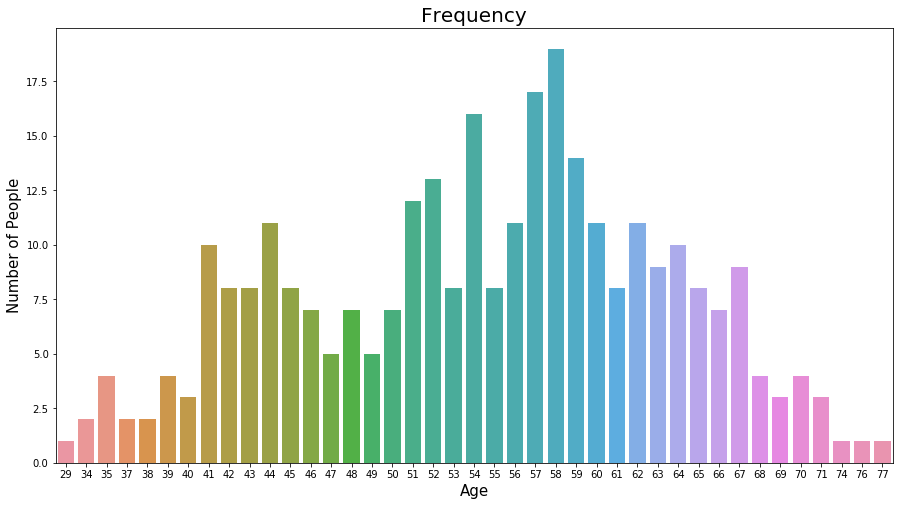

In [132]:
#no of people having heart disease based on age
plt.figure(figsize = (15,8))
sns.countplot(hd['age'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


Text(0.5, 1.0, 'Histogram')

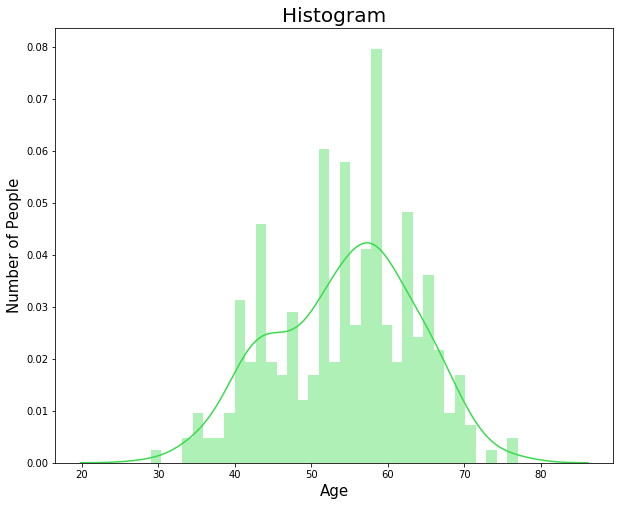

In [133]:
#Plotting the Distribution of Age. 
#Histogram
plt.figure(figsize = (10,8))
sns.distplot(hd['age'], bins = 35, kde = True)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Histogram', fontsize = 20)


Text(0.5, 1.0, 'Frequency')

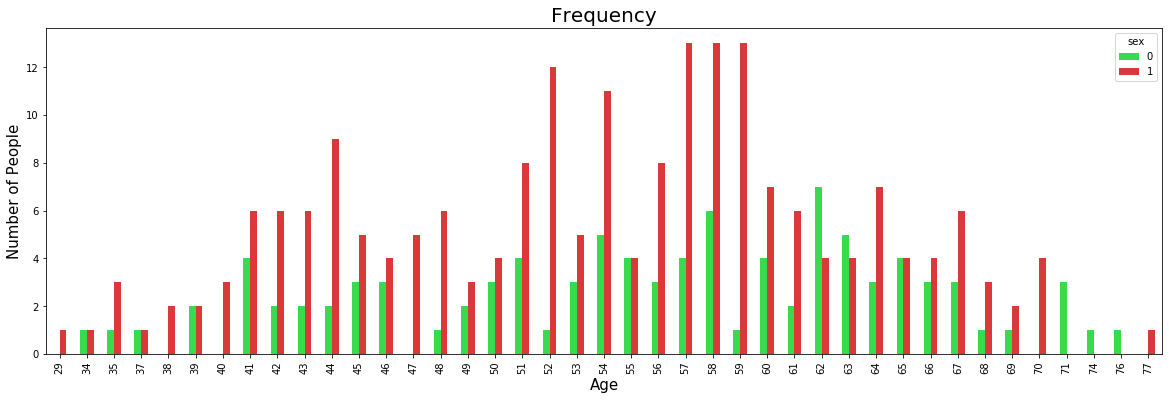

In [134]:
#lets crosstabs for age and gender.
pd.crosstab(hd.age,hd.sex).plot(kind='bar',figsize=(20,6))
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


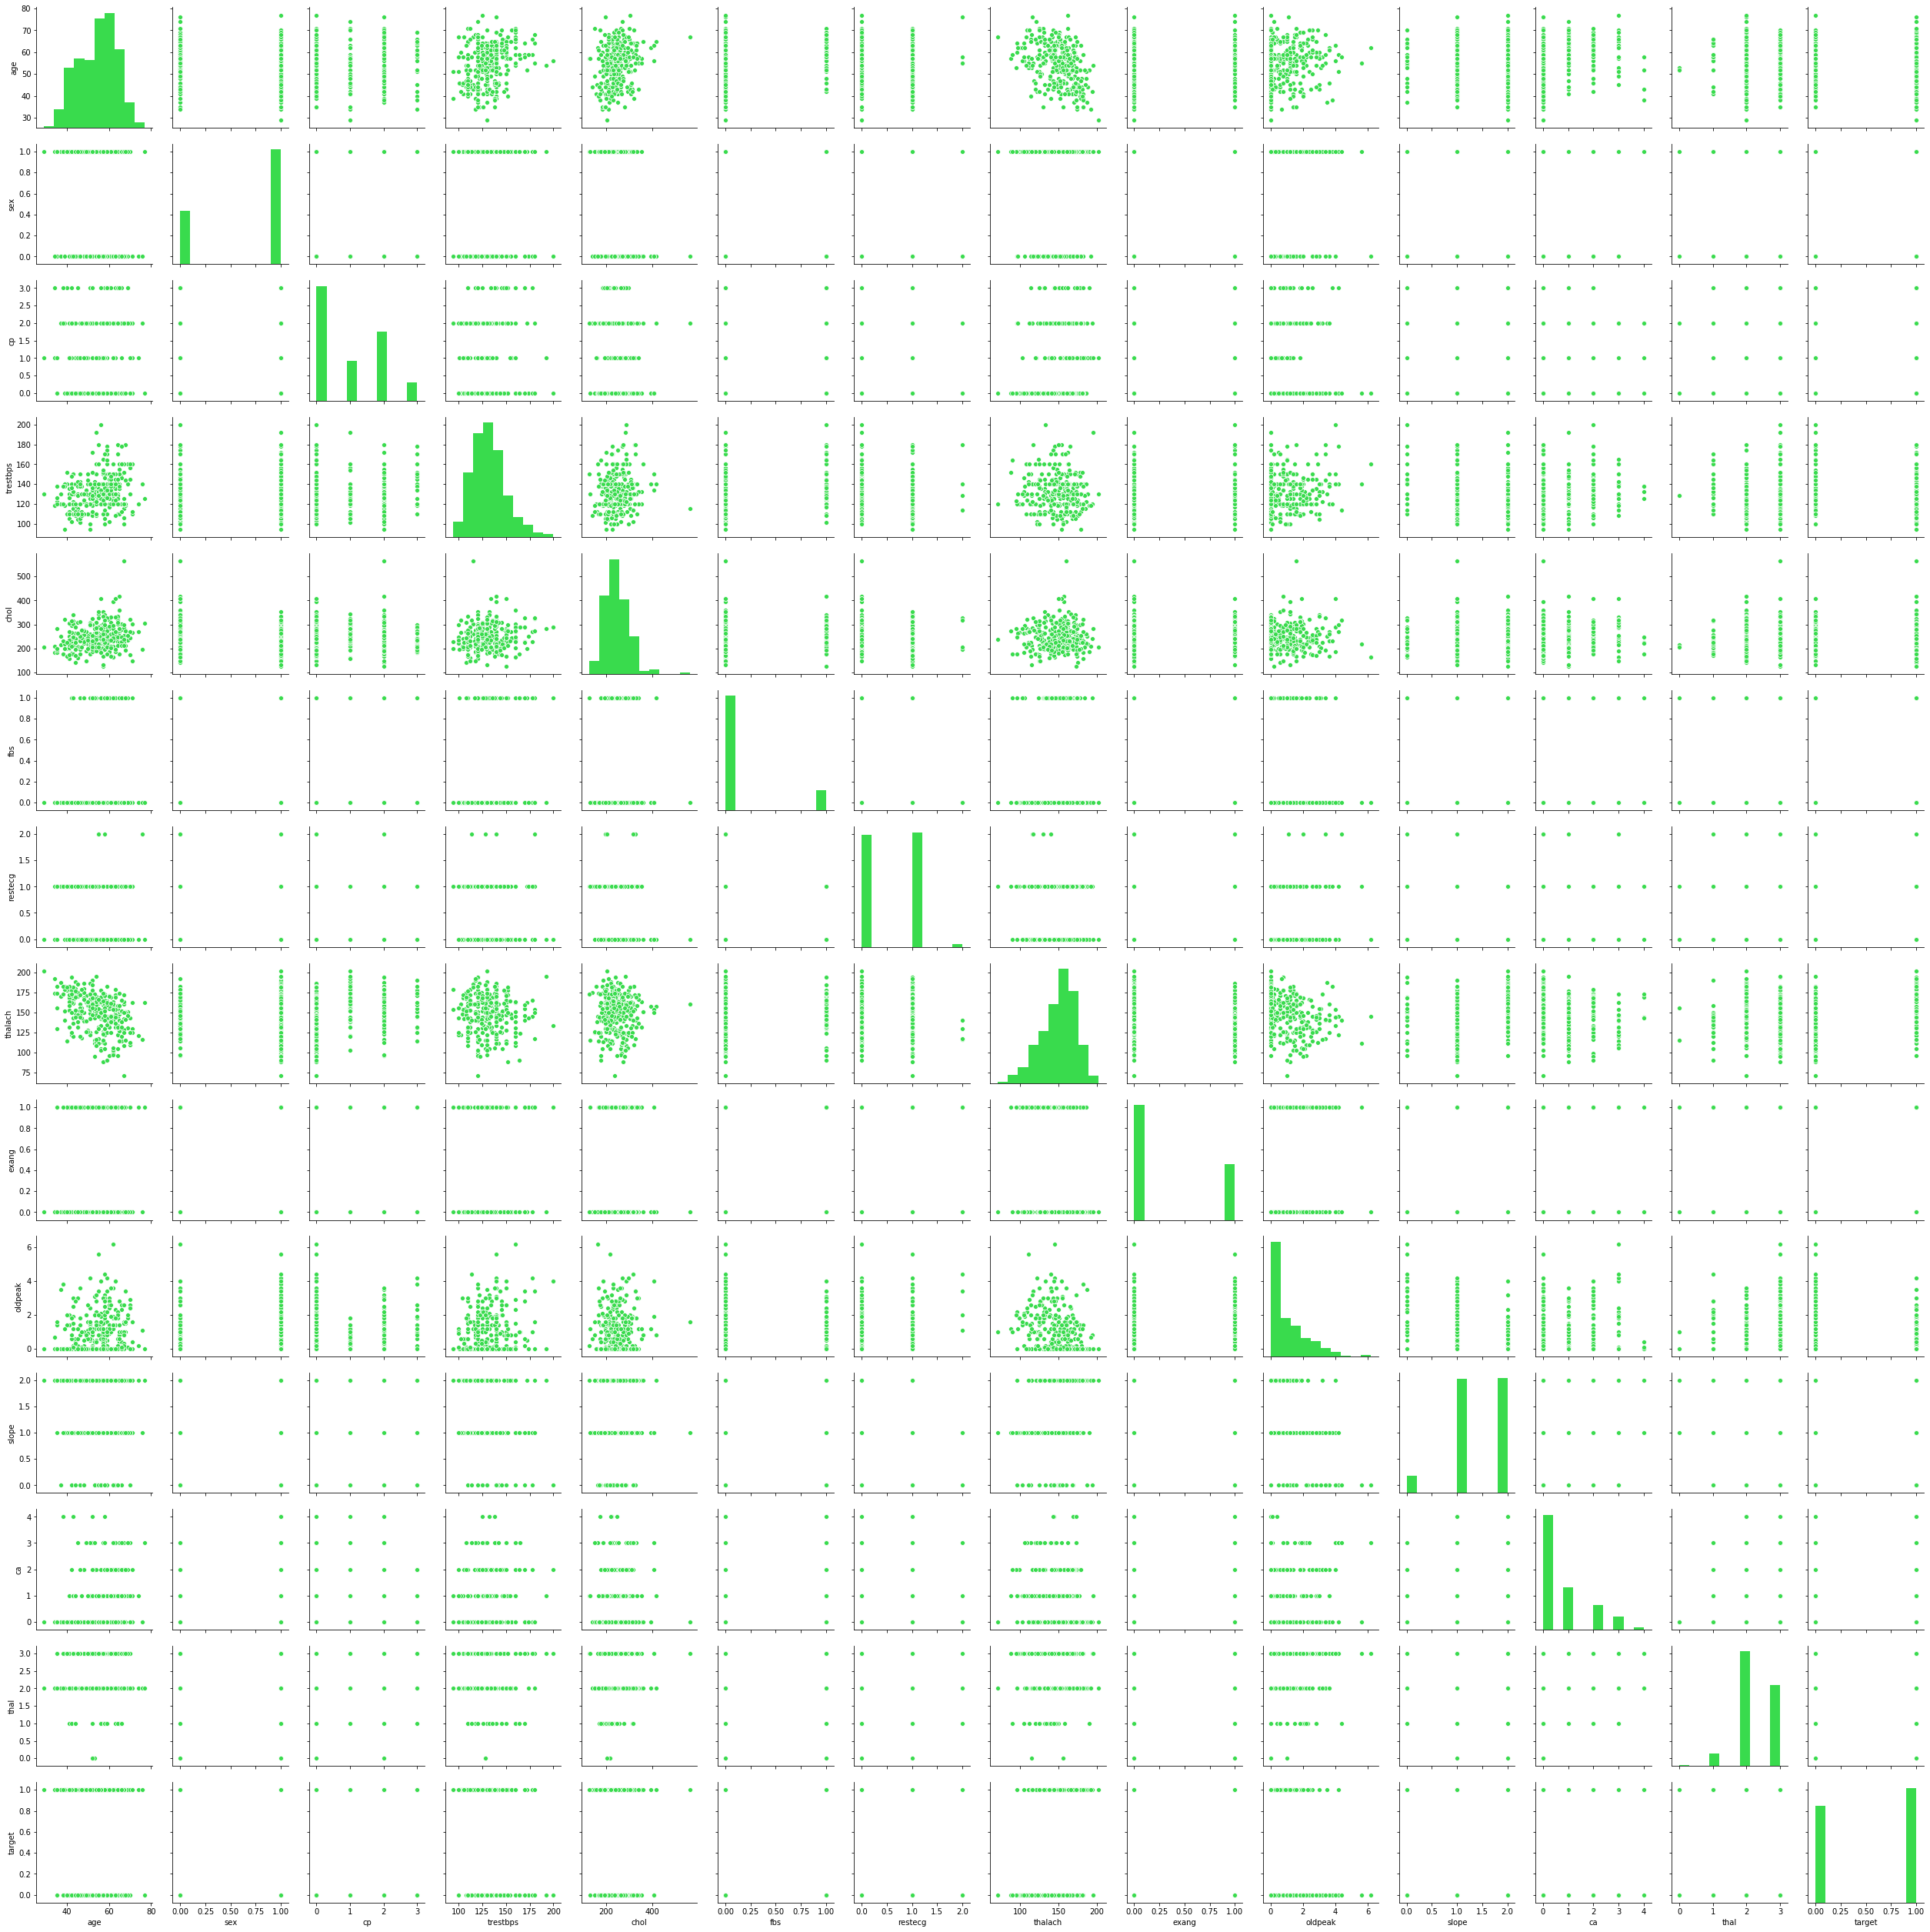

In [135]:
#finding correlation with all features
sns.pairplot(hd);


In [136]:
#finding missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [137]:
# correlation found between age & testbps , age & chol, chol & testbps, testbps & thalach, thalach & chol,thalach & age, age & old peak, old peak & testbps, old peak & chol,

In [138]:
#creating age bins for certain age group
hd['age']=hd['age']
bins=[29,47,55,61,77]
labels=["Young Adult","Early Adult","Adult","Senior"]
hd['age_group']=pd.cut(hd['age'],bins,labels=labels)
hd.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Senior
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Adult


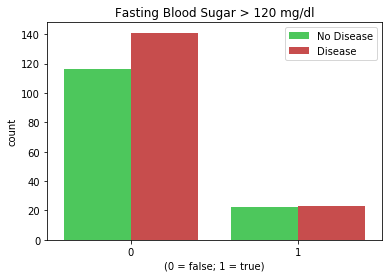

In [139]:
# plot fbs (fasting blood sugar) 
target_colors = ["#39db4d", "#db3939"]

sns.set_palette(target_colors)
sns.countplot(hd.fbs, hue=hd.target)
plt.title("Fasting Blood Sugar > 120 mg/dl")
plt.xlabel("(0 = false; 1 = true)")
plt.legend(["No Disease", "Disease"])
plt.show()


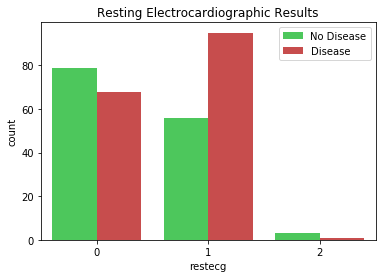

In [140]:
# plot restecg (resting electrocardiographic results) 
sns.set_palette(target_colors)
sns.countplot(hd.restecg, hue=hd.target)
plt.title("Resting Electrocardiographic Results")
plt.legend(["No Disease", "Disease"])
plt.show()


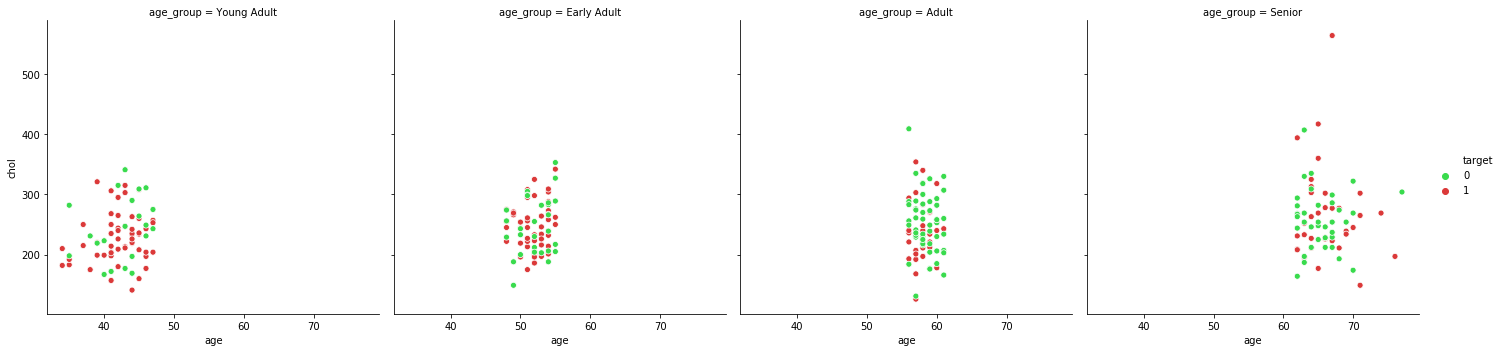

In [141]:
#plotting graph between age and chol
sns.relplot(x="age", y="chol", hue="target",
            col="age_group", data=hd);


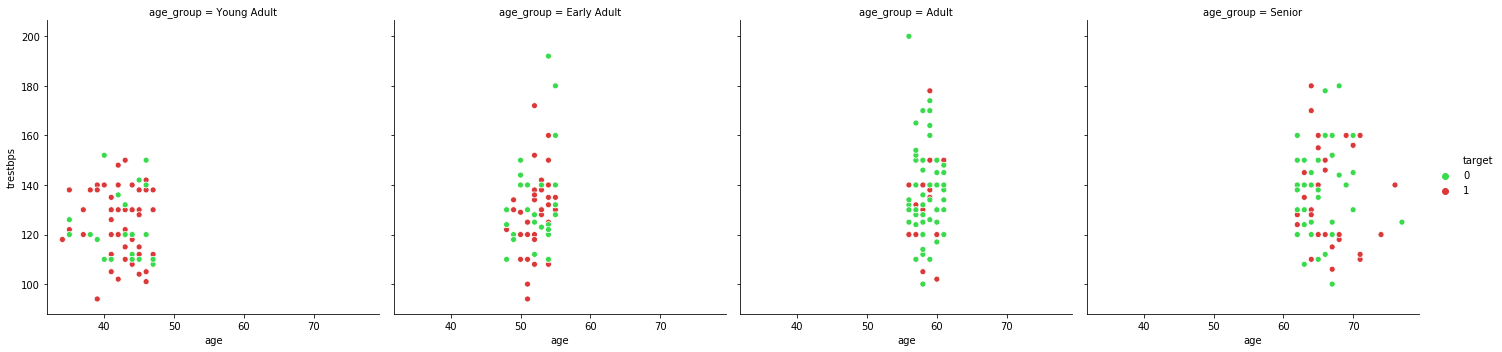

In [142]:
#plotting graph between age and trestbps

sns.relplot(x="age", y="trestbps", hue="target",
            col="age_group", data=hd);


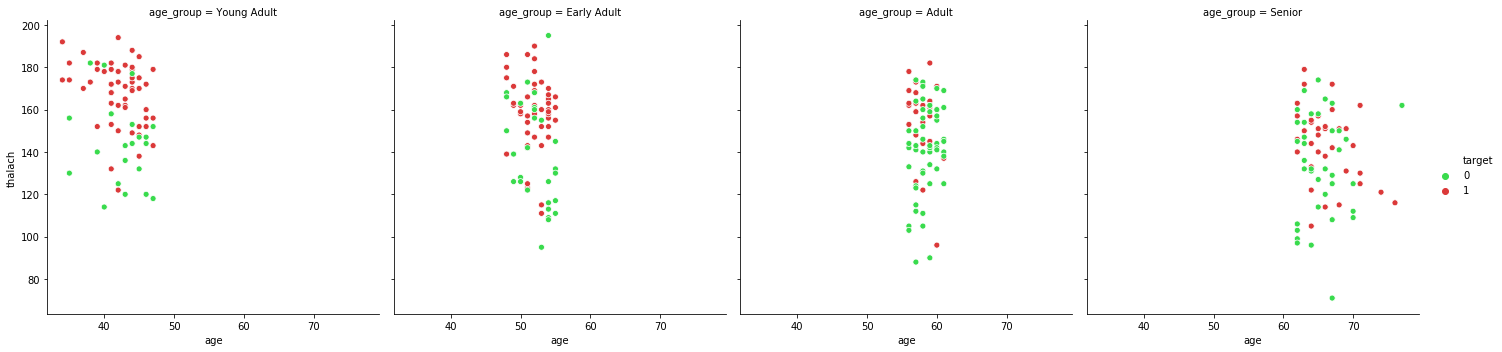

In [143]:
#plotting graph between age and thalach

sns.relplot(x="age", y="thalach", hue="target",
            col="age_group", data=hd);


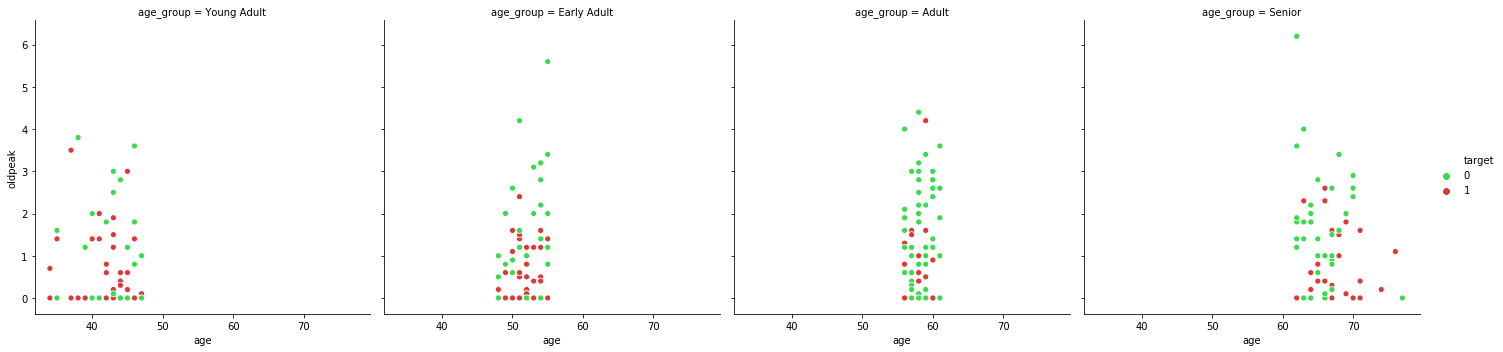

In [144]:
#plotting graph between age and oldpeak

sns.relplot(x="age", y="oldpeak", hue="target",
            col="age_group", data=hd);


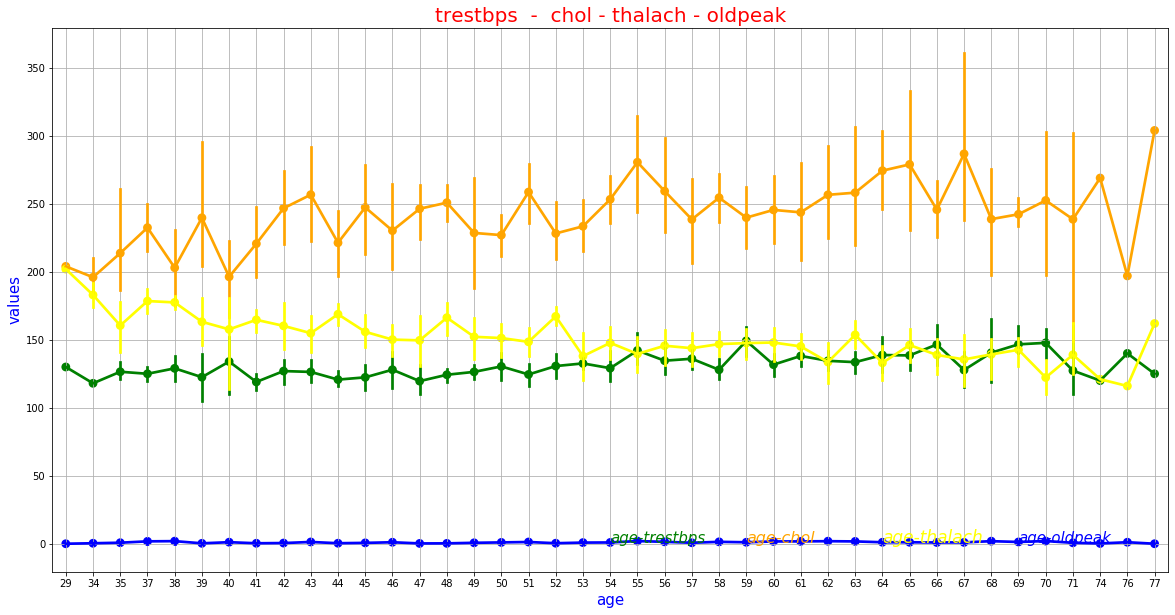

In [145]:
#creating correlation plot between features
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='age',y='trestbps',data=hd,color='green',alpha=0.4)
sns.pointplot(x='age',y='chol',data=hd,color='orange',alpha=0.4)
sns.pointplot(x='age',y='thalach',data=hd,color='yellow',alpha=0.4)
sns.pointplot(x='age',y='oldpeak',data=hd,color='blue',alpha=0.4)
plt.text(20,0.4,'age-trestbps',color='green',fontsize = 15,style = 'italic')
plt.text(25,0.5,'age-chol',color='orange',fontsize = 16,style = 'italic')
plt.text(30,0.6,'age-thalach',color='yellow',fontsize = 17,style = 'italic')
plt.text(35,0.4,'age-oldpeak',color='blue',fontsize = 15,style = 'italic')

plt.xlabel('age',fontsize = 15,color='blue')
plt.ylabel('values',fontsize = 15,color='blue')
plt.title('trestbps  -  chol - thalach - oldpeak',fontsize = 20,color='red')
plt.grid()


Text(0.5, 1.0, 'Percentage of people as per chest pain type')

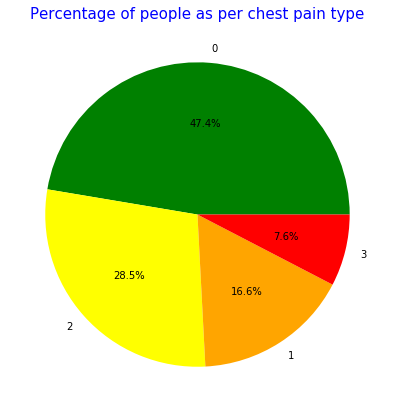

In [146]:
#plotting pie graph based on chest pain type
hd.cp.dropna(inplace = True)
labels = hd.cp.value_counts().index
colors = ['green','yellow','orange','red']
explode = [0,0,0,0]
sizes = hd.cp.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of people as per chest pain type',color = 'blue',fontsize = 15)

In [147]:
#finding outliers
highchol = hd[hd.chol>500]
highchol


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,Senior


In [148]:
#dropping outliers
hd2 = hd.drop(hd.index[85])
hd2[81:86]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1,Young Adult
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1,Adult
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1,Early Adult
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1,Young Adult
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1,Senior


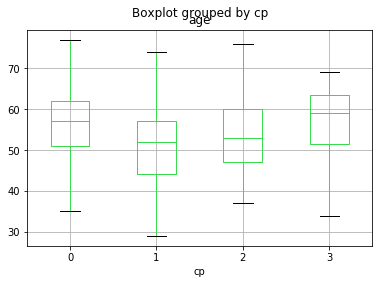

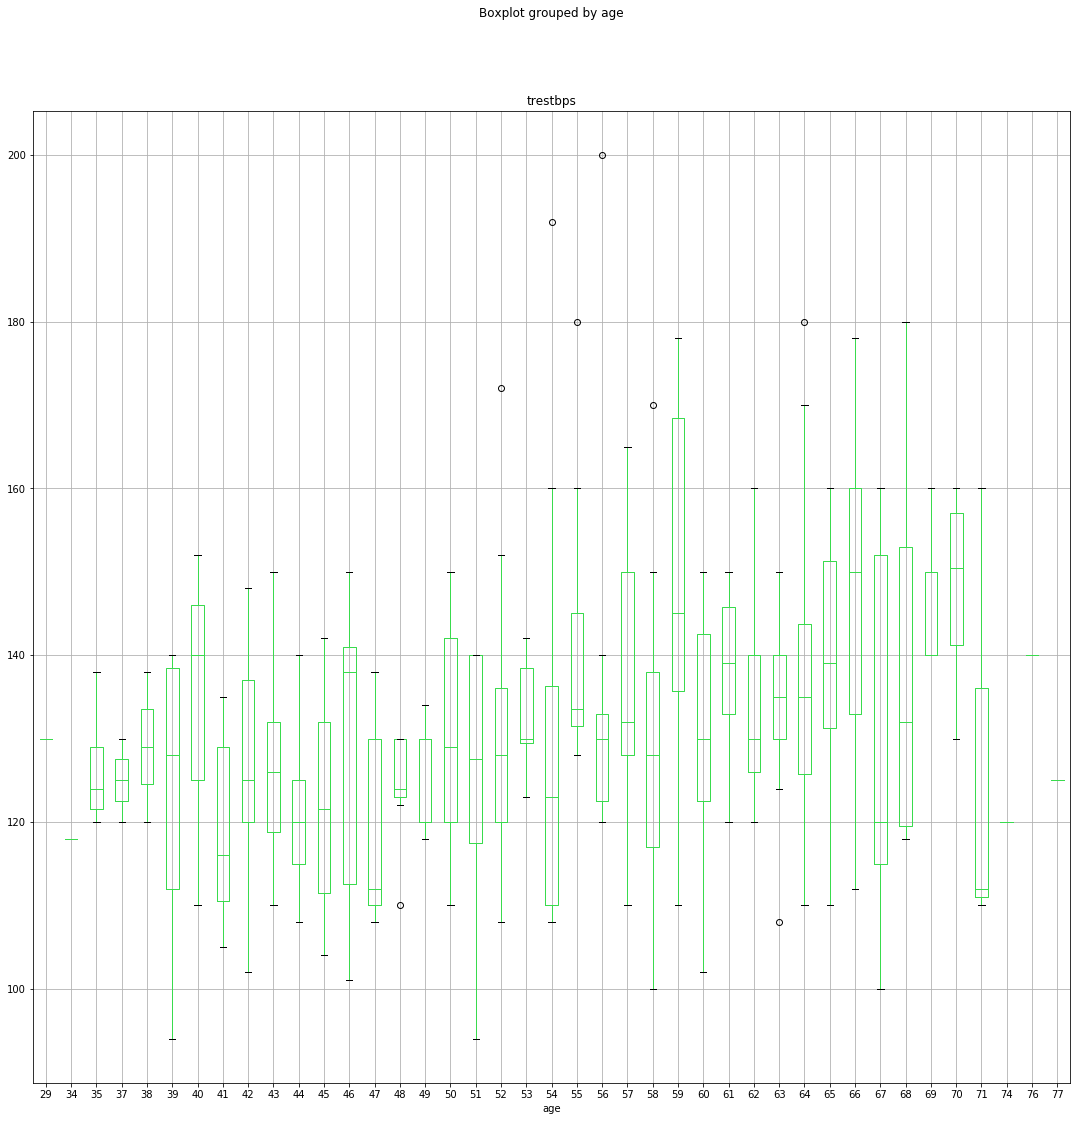

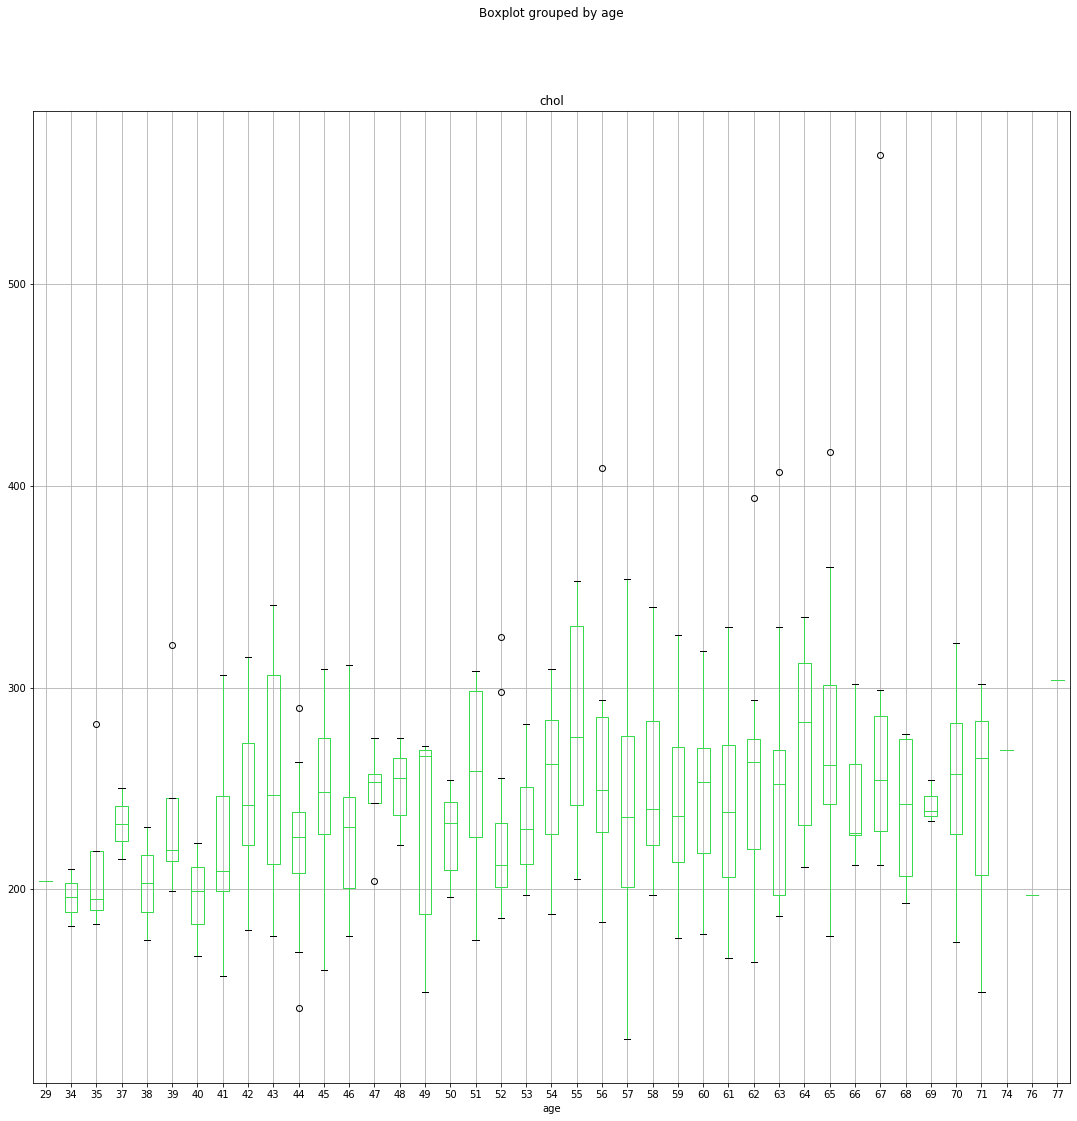

In [149]:
#checking for outliers
hd.boxplot(column='age',by='cp')
plt.show()
#boxplot between age and trestbps
hd.boxplot(column='trestbps',by='age', figsize=(18,18))
plt.show()

#boxplot between age and chol
hd.boxplot(column='chol',by='age', figsize=(18,18))
plt.show()



In [150]:
mean_hd = hd2.mean()
mean_hd

age          54.378738
sex           0.684385
cp            0.960133
trestbps    131.657807
chol        245.445183
fbs           0.149502
restecg       0.528239
thalach     149.534884
exang         0.328904
oldpeak       1.041196
slope         1.398671
ca            0.720930
thal          2.312292
target        0.541528
dtype: float64

In [151]:
std_hd = hd2.std()
std_hd

age          9.033793
sex          0.465534
cp           1.032023
trestbps    17.566422
chol        48.479011
fbs          0.357176
restecg      0.526023
thalach     22.933737
exang        0.470597
oldpeak      1.162940
slope        0.616872
ca           1.007568
thal         0.612766
target       0.499102
dtype: float64

In [152]:
COQ = 3*std_hd
COQ

age          27.101379
sex           1.396602
cp            3.096070
trestbps     52.699266
chol        145.437032
fbs           1.071528
restecg       1.578068
thalach      68.801210
exang         1.411792
oldpeak       3.488821
slope         1.850617
ca            3.022705
thal          1.838297
target        1.497307
dtype: float64

In [153]:
#filtering
Earlyadult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Early Adult") & (hd.cp>1)]
Earlyadult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1,Early Adult
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Early Adult
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1,Early Adult


In [154]:
adult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Adult") & (hd.cp>1)]
adult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,Adult
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,Adult
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,Adult
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,Adult


In [155]:
senior_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Senior") & (hd.cp>1)]
senior_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,Senior
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,Senior
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1,Senior
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1,Senior
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1,Senior
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,Senior
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0,Senior
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,Senior
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,Senior


In [156]:
overallpeople=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.cp>1)]
overallpeople

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,Adult
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,Senior
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1,Early Adult
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1,Senior
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Early Adult
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1,Young Adult
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1,Young Adult
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1,Senior
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1,Early Adult


In [157]:
hd1 = hd.drop('age_group',axis =1)
hd1.head(5)
hd1.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [158]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Senior
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young Adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Adult
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Young Adult
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Senior
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Adult


In [159]:
#Removing outliers

from scipy import stats
hd1[(np.abs(stats.zscore(hd1)) < 3).all(axis=1)]


    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [160]:
hd1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [162]:
#using random forest finding feature importance
X_train, X_test, y_train, y_test = train_test_split(hd1.drop('target', 1), hd1['target'], test_size = .2, random_state=10) #split the data


In [163]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)


Score list: [ 16.13671571   8.05357317  41.07877439  15.92541661  29.16415066
   1.26953413   1.81109468 150.70831021  29.22601968  63.91398061
   8.95890197  75.39499175   3.88379468]
Feature list: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.7377049180327869


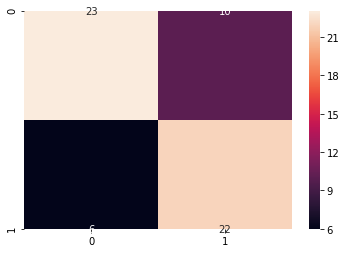

In [173]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")


In [176]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

In [177]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

Optimal number of features : 13
Best features : Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 2 (0.163772)
2. feature 9 (0.162371)
3. feature 7 (0.125357)
4. feature 0 (0.104353)
5. feature 4 (0.088754)
6. feature 11 (0.088466)
7. feature 1 (0.060764)
8. feature 3 (0.056963)
9. feature 12 (0.047040)
10. feature 8 (0.040843)
11. feature 10 (0.038707)
12. feature 6 (0.016491)
13. feature 5 (0.006119)


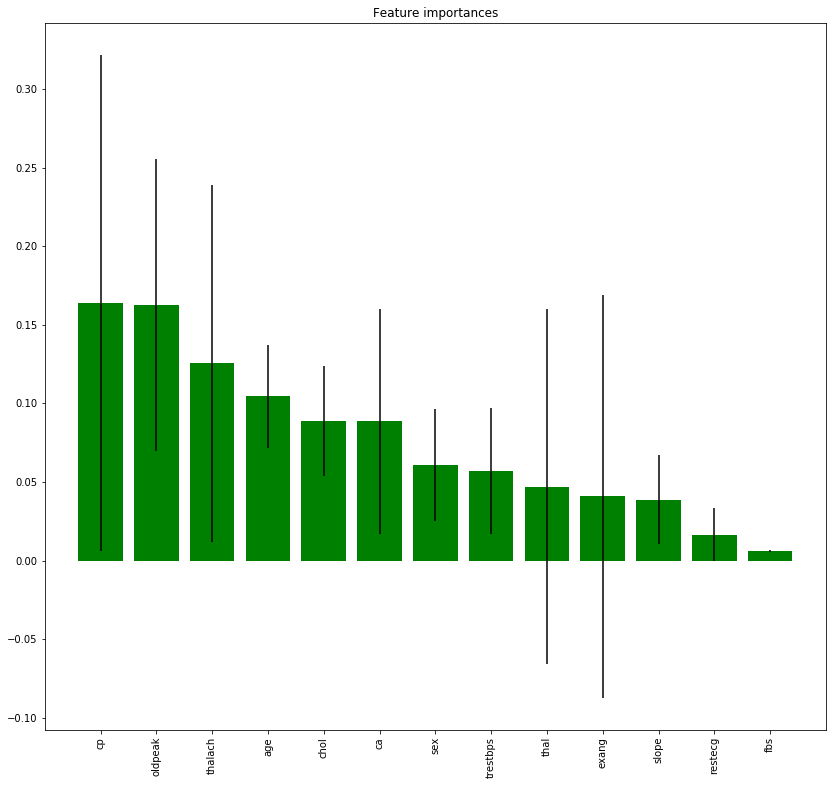

In [179]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
